# Simple Linear Regression

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('./Data/Boston.csv')

In [3]:
df.head()

,Unnamed: 0,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [4]:
X = df.iloc[:,1:-1]
X.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33


In [5]:
y = df.iloc[:,-1]
y

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: medv, Length: 506, dtype: float64

In [6]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)

In [7]:
X_train

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat
5,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21
116,0.13158,0.0,10.01,0,0.547,6.176,72.5,2.7301,6,432,17.8,393.30,12.04
45,0.17142,0.0,6.91,0,0.448,5.682,33.8,5.1004,3,233,17.9,396.90,10.21
16,1.05393,0.0,8.14,0,0.538,5.935,29.3,4.4986,4,307,21.0,386.85,6.58
468,15.57570,0.0,18.10,0,0.580,5.926,71.0,2.9084,24,666,20.2,368.74,18.13
...,...,...,...,...,...,...,...,...,...,...,...,...,...
106,0.17120,0.0,8.56,0,0.520,5.836,91.9,2.2110,5,384,20.9,395.67,18.66
270,0.29916,20.0,6.96,0,0.464,5.856,42.1,4.4290,3,223,18.6,388.65,13.00
348,0.01501,80.0,2.01,0,0.435,6.635,29.7,8.3440,4,280,17.0,390.94,5.99
435,11.16040,0.0,18.10,0,0.740,6.629,94.6,2.1247,24,666,20.2,109.85,23.27


In [8]:
y_train

5      28.7
116    21.2
45     19.3
16     23.1
468    19.1
       ... 
106    19.5
270    21.1
348    24.5
435    13.4
102    18.6
Name: medv, Length: 354, dtype: float64

In [9]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [10]:
X_train=scaler.fit_transform(X_train)

In [11]:
X_test=scaler.transform(X_test)

In [12]:
from sklearn.linear_model import LinearRegression
regression = LinearRegression()

In [13]:
regression.fit(X_train,y_train)

LinearRegression()

In [14]:
from sklearn.model_selection import cross_val_score
mse = cross_val_score(regression,X_train,y_train,scoring='neg_mean_squared_error',cv=10)

In [15]:
import numpy as np
np.mean(mse)

-25.550660791660796

In [16]:
reg_pred = regression.predict(X_test)

In [17]:
reg_pred

array([28.64896005, 36.49501384, 15.4111932 , 25.40321303, 18.85527988,
       23.14668944, 17.3921241 , 14.07859899, 23.03692679, 20.59943345,
       24.82286159, 18.53057049, -6.86543527, 21.80172334, 19.22571177,
       26.19191985, 20.27733882,  5.61596432, 40.44887974, 17.57695918,
       27.44319095, 30.1715964 , 10.94055823, 24.02083139, 18.07693812,
       15.934748  , 23.12614028, 14.56052142, 22.33482544, 19.3257627 ,
       22.16564973, 25.19476081, 25.31372473, 18.51345025, 16.6223286 ,
       17.50268505, 30.94992991, 20.19201752, 23.90440431, 24.86975466,
       13.93767876, 31.82504715, 42.56978796, 17.62323805, 27.01963242,
       17.19006621, 13.80594006, 26.10356557, 20.31516118, 30.08649576,
       21.3124053 , 34.15739602, 15.60444981, 26.11247588, 39.31613646,
       22.99282065, 18.95764781, 33.05555669, 24.85114223, 12.91729352,
       22.68101452, 30.80336295, 31.63522027, 16.29833689, 21.07379993,
       16.57699669, 20.36362023, 26.15615896, 31.06833034, 11.98

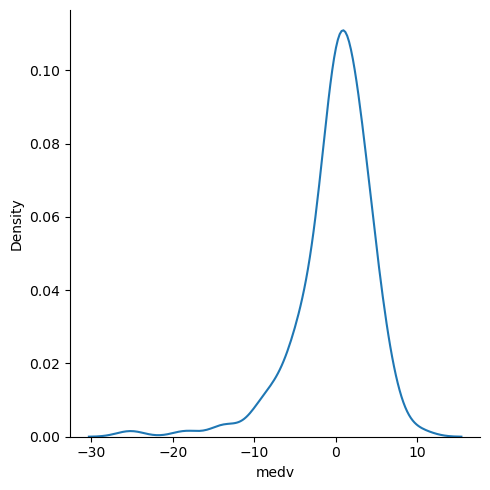

In [18]:
import seaborn as sns
sns.displot(reg_pred-y_test,kind='kde')

In [19]:
from sklearn.metrics import r2_score


In [20]:
score = r2_score(reg_pred,y_test)

In [21]:
score

0.6693702691495591

# Ridge Regression (L2 Regularization)

In [25]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

In [26]:
ridge_regressor = Ridge()

In [27]:
ridge_regressor

Ridge()

In [28]:
parameter={'alpha':[1,2,5,10,20,30,40,50,60,70,80,90]}
ridge_cv = GridSearchCV(
    ridge_regressor,
    parameter,
    scoring='neg_mean_squared_error',
    cv=5
)
ridge_cv.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [1, 2, 5, 10, 20, 30, 40, 50, 60, 70, 80,
                                   90]},
             scoring='neg_mean_squared_error')

In [29]:
print(ridge_cv.best_params_)

{'alpha': 10}


In [30]:
print(ridge_cv.best_score_)

-25.80722882229146


In [32]:
ridge_pred=ridge_cv.predict(X_test)

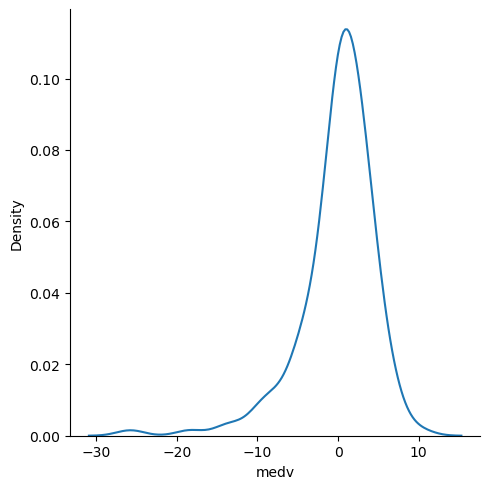

In [33]:
import seaborn as sns
sns.displot(ridge_pred-y_test,kind='kde')

In [36]:
score = r2_score(ridge_pred,y_test)
score

0.6468557055633654

# Lasso Regression (L1 Regularization)

In [37]:
from sklearn.linear_model import Lasso

In [38]:
lasso = Lasso()

In [40]:
parameter={'alpha':[1,2,5,10,20,30,40,50,60,70,80,90]}
lasso_cv = GridSearchCV(
    lasso,
    parameter,
    scoring='neg_mean_squared_error',
    cv=5
)
lasso_cv.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [1, 2, 5, 10, 20, 30, 40, 50, 60, 70, 80,
                                   90]},
             scoring='neg_mean_squared_error')

In [41]:
print(lasso_cv.best_params_)

{'alpha': 1}


In [42]:
print(lasso_cv.best_score_)

-31.153603752119004


In [43]:
lasso_pred=lasso_cv.predict(X_test)

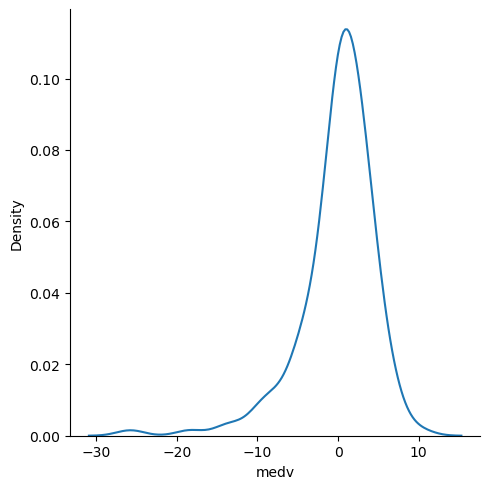

In [44]:
import seaborn as sns
sns.displot(ridge_pred-y_test,kind='kde')